$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 0** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Introduction to Probability, Ipython Primer**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide, Mikael** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 26/3** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Tobias Alldén, 19950222-4158., allden@student.chalmers.se; Joakim Milleson, 19940210-6497, joamill@student.chalmers.se** <br />

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

**Jupyter/IPython Notebook** is a collaborative Python web-based environment. This will be used in all our Homework Assignments except for Neural Network assignment which is be based on matlab. It is installed in the halls ES61-ES62, E-studio and MT9. You can also use google-colab: https://research.google.com/colaboratory/faq.html 
to run these notebooks without having to download, install, or do anything on your own computer other than a browser.
Some useful resources:
1. https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/ (Quick-start guide)
2. https://www.kdnuggets.com/2016/04/top-10-ipython-nb-tutorials.html
3. http://data-blog.udacity.com/posts/2016/10/latex-primer/ (latex-primer)
4. http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html (markdown)

# Theoretical problems

## [Bayes Rule, 5 points]

After your yearly checkup, the doctor has bad news and good news. The
bad news is that you tested positive for a very serious cancer and
that the test is 99% accurate i.e. the probability of testing
positive given you have the disease is 0.99. The probability of
testing negative if you don’t have the disease is the same. The good news is that it is a very rare condition affecting only 1 in 10,000 people. What is the probability you actually have the disease? (Show all calculations and the final result.)

## [Correlation and Independence, 5 points]

Let $X$ be a continuous variable, uniformly distributed in $[-1, +1]$ and let $Y := X^2$. Clearly $Y$ is not independent of $X$ -- in fact it is uniquely determined by $X$. However, show that $\mbox{cov}(X, Y ) = 0$.

## [Setting hyperparameters, 3 points]

Suppose $\theta \sim \mbox{Beta}(a,b)$ and we believe $E[\theta] = m$
and $\mbox{var}(\theta) = v$. How should the parameters $a$ and $b$ be
set to be consistent with this? Confirm that this gives the same values claimed in the lecture.

# Solution to the theoretical problems
Below follows the solutions to the theoretical problems

## Bayers Rule

To solve this question we use the Bayers rule. Given that there is a 99% chance of testing positive on having the desease and 99% to test negative if one does not have the desease, while the probability of having the desease is only 1 in 10000, we create the following table:


|      | cancer(0.01%)   | no cancer(99.99)     |
|------|------|------|
| Test Pos  | 99%|  1%    |
| Test Neg  |  1% | 99%  |

To check whether the subject actually have cancer we use Bayers Rule wich is defined as:
$$P(A\mid B) = \frac{P(B\mid A)P(A)}{P(B)}$$

where 
* P(A|B) = The chance of testing positive given that you have the cancer
* P(B|A) = The chance of having the cancer given a positive result
* P(A) = The chance of testing positive
* P(B) = The chance of having the cancer

We want to know P(B|A).

We use Bayes rule which states
P(B|A) = $\frac{P(A | B) * P(B)}{P(A)}$

We have all but P(A): 

P(A) = P(A|B) * P(B) + P(A|$\neg$B) * P($\neg$B)

We insert our values:

P(A) = 0.99 * 0.0001 + 0.01 * 0.9999 = 0.010098

Inserting this into our original formula we get

P(B|A) = $\frac{0.99 * 0.0001}{0.010098} = 0.0098039216 $

As such, there is a only about 0.98% that the subject actually have the cancer

## Correlation and Independence

We wish to show that the covariance between X and Y is equal to zero. As X is uniformely distributed, its probability is the same for each value. Covariance is defined as $Cov(X,Y) = E[(X-E[X](Y-E[Y]]$. As X is uniformely distributed in [-1,1] it have $E[X] = \frac{-1+1}{2} = 0 $. We thus get $Cov(X,Y) = E[X - 0*(Y-E[Y])] = E[X] = 0$


## Setting hyperparameters
-


# Practical problems

## [Plotting normal distributed points, 5 points]

Generate $1000$ points from 2D multivariate normal
distribution having mean $\mu = \left[
\begin{array}{c}
  1  \\
  1
\end{array}
\right]$ and covariance $\Sigma =
\left[
  \begin{array}{rr}
    0.1 & -0.05 \\
    -0.05&  0.2
  \end{array}
\right]
$.  Define the function $f({\bf x}, r) := \frac{({\bf x} - \mu)^{ \top } * \Sigma^{-1} *
  ({\bf x} - \mu) }{ 2} - r $. On a single plot, show the following:
* The level sets $f({\bf x}, r) = 0$ for $r=1, 2, 3$.
* Scatter plot of randomly generated points with points lying
outside $f({\bf x} , 3) = 0$ showing in black while points inside shown in
blue.
* Title of the plot showing how many points lie outside $f({\bf
    x}, 3) = 0$.
Submit your final plot as well as your implementation.

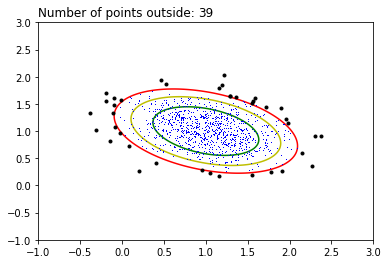

In [117]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

# Mean and covariance (sigma)
mean = [1,1]
cov = [[0.1,-0.05],[-0.05,0.2]]

# Function
def f(x,r):
    transposed = np.transpose(np.array(x) - np.array(mean))
    sigmaInv = np.linalg.inv(cov)
    sub = np.array(x)-np.array(mean)
    return (sub.dot(sigmaInv).dot(transposed))/2 - r


# Generate random points data 
randomData = np.random.multivariate_normal(mean,cov,1000)

# Generate solution space with 300 points
axis = np.linspace(-1,3,num=300)
X,Y = np.meshgrid(axis,axis)

# Create the three contours
data = [[],[],[]]

# Generate contours
for i in range(1,4):
    for j in range(len(axis)):
        data[i-1].append([])
        for k in range(len(axis)):
            data[i-1][j].append(f([axis[j],axis[k]],i))

## Generate the contours
plt.contour(X,Y, np.array(data[0]), [0], colors='g')
plt.contour(X,Y, np.array(data[1]), [0], colors='y')
plt.contour(X,Y, np.array(data[2]), [0], colors='r')
    
insidePoints = []
outsidePoints = []

# Add data points to outsideset or insideset
for i in range(len(randomData)):
    if f(randomData[i],3) > 0: 
        outsidePoints.append(randomData[i])
    else:
        insidePoints.append(randomData[i])

plt.plot(np.transpose(outsidePoints)[1], np.transpose(outsidePoints)[0], 'k.')
plt.plot(np.transpose(insidePoints)[1], np.transpose(insidePoints)[0], 'b,')
    
plt.title('Number of points outside:' , loc='left')
plt.title(len(outsidePoints))

plt.show()




## [Covariance and correlation, 5 points]
Load dataset0.txt ($X$) containing 1074 data points
each having 12 features related to US schools. Compute the covariance
and correlation matrix for $X$. Scale each feature
in $X$ between $[0, 1]$ to obtain a new dataset $Y$. Compute the
covariance and correlation matrices for $X$ and $Y$, and plot them (e.g. as colormaps).
What do you observe? Show a scatter plot of the pair of features in $Y$ having minimum
correlation, indicating in the title the feature indices and the
correlation value. Submit the plots, comments and your implementation.

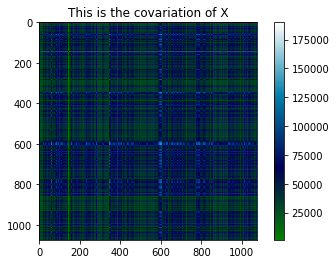

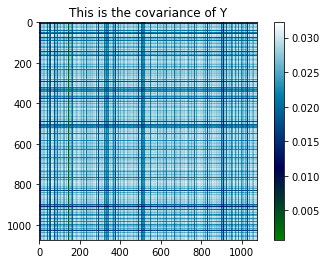

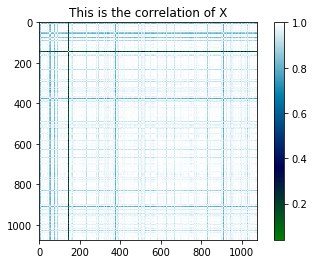

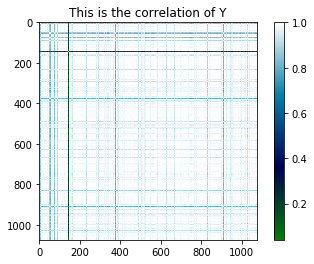

In [120]:

data = np.loadtxt("dataset0.txt")

# Covariance and correlation of X (indata)
covX = np.cov(data)
corrX = np.corrcoef(data)

# Scale each feature in X -> Y
# Covariance and correlation of Y
y = pre.normalize(data)
covY = np.cov(y)
corrY = np.corrcoef(data)

# Ploting the covariance of X (indata)
plt.title("This is the covariation of X")
plt.imshow(covX, cmap=plt.cm.ocean)
plt.colorbar()

# Ploting the covariance of Y
plt.figure()
plt.title("This is the covariance of Y")
plt.imshow(covY, cmap=plt.cm.ocean)
plt.colorbar()

# Ploting the correlation of X
plt.figure()
plt.title("This is the correlation of X")
plt.imshow(corrX, cmap=plt.cm.ocean)
plt.colorbar()

# Ploting the correlation of Y
plt.figure()
plt.title("This is the correlation of Y")
plt.imshow(corrY, cmap=plt.cm.ocean)
plt.colorbar()

# We interpret the results as the correlation being simular between X and Y given their simular shape& look.
# However the covariation is not simular and thus we believe that it is not the same.